In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_probability_distribution(N, lambda_param):
    """
    Compute probability distribution based on given parameters.

    Parameters:
    N (int): Size of the probability array
    lambda_param (float): Lambda parameter for the distribution

    Returns:
    numpy.ndarray: Probability distribution array

    Raises:
    ValueError: If probabilities don't sum to 1
    """
    # Initialize probability array
    p = np.zeros(N)

    # First probability
    p[0] = lambda_param / (lambda_param + 1)

    # Probabilities 2 through N-1 (indices 1 through N-2)
    for i in range(1, N-1):
        p[i] = (1 - np.sum(p[:i])) * lambda_param / (lambda_param + 1)

    # Last probability
    p[N-1] = p[N-2] / lambda_param

    # Check if probabilities sum to 1
    if not np.isclose(np.sum(p), 1.0):
        raise ValueError("Probabilities don't sum to 1")

    return p

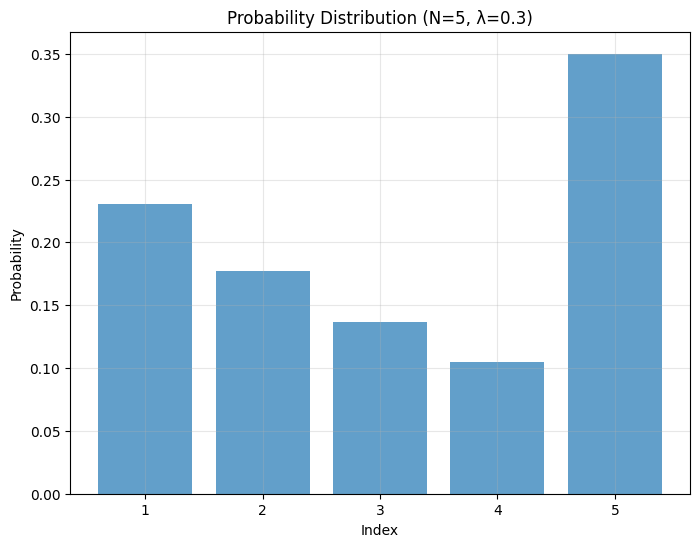

Distribution for N=5, λ=0.3:
Values: [0.23076923 0.17751479 0.13654984 0.10503834 0.3501278 ]
Sum: 1.000000


In [19]:
max_duration = 1.5
ifi = 1/60
N = int(max_duration / ifi)
lambda_param = 0.3
N = 5

# Compute distribution
p = compute_probability_distribution(N, lambda_param)

# Create simple histogram
plt.figure(figsize=(8, 6))
plt.bar(range(1, N+1), p, alpha=0.7)
plt.title(f'Probability Distribution (N={N}, λ={lambda_param})')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Distribution for N={N}, λ={lambda_param}:")
print(f"Values: {p}")
print(f"Sum: {np.sum(p):.6f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from probability_utils import compute_probability_distribution

def plot_distribution_vs_N():
    """Plot how the distribution changes as N varies (fixed lambda)"""
    lambda_param = 2.0
    N_values = [5, 10, 15, 20]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, N in enumerate(N_values):
        p = compute_probability_distribution(N, lambda_param)
        axes[i].bar(range(1, N+1), p, alpha=0.7, color=f'C{i}')
        axes[i].set_title(f'N = {N}, λ = {lambda_param}')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Probability')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Distribution vs N (Fixed λ = 2.0)', y=1.02, fontsize=14)
    plt.show()

def plot_distribution_vs_lambda():
    """Plot how the distribution changes as lambda varies (fixed N)"""
    N = 10
    lambda_values = [0.5, 1.0, 2.0, 5.0]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, lambda_param in enumerate(lambda_values):
        p = compute_probability_distribution(N, lambda_param)
        axes[i].bar(range(1, N+1), p, alpha=0.7, color=f'C{i}')
        axes[i].set_title(f'N = {N}, λ = {lambda_param}')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Probability')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Distribution vs λ (Fixed N = 10)', y=1.02, fontsize=14)
    plt.show()

def plot_combined_comparison():
    """Plot multiple distributions on the same axes for comparison"""
    N = 15
    lambda_values = [0.5, 1.0, 2.0, 5.0]

    plt.figure(figsize=(12, 8))

    for lambda_param in lambda_values:
        p = compute_probability_distribution(N, lambda_param)
        plt.plot(range(1, N+1), p, 'o-', label=f'λ = {lambda_param}',
                marker='o', markersize=4, linewidth=2)

    plt.xlabel('Index', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title(f'Probability Distributions for Different λ values (N = {N})', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_heatmap_parameter_space():
    """Create a heatmap showing how distribution characteristics change"""
    N_range = range(5, 21)
    lambda_range = np.linspace(0.5, 5.0, 20)

    # Calculate maximum probability for each parameter combination
    max_probs = np.zeros((len(lambda_range), len(N_range)))

    for i, lambda_param in enumerate(lambda_range):
        for j, N in enumerate(N_range):
            try:
                p = compute_probability_distribution(N, lambda_param)
                max_probs[i, j] = np.max(p)
            except:
                max_probs[i, j] = np.nan

    plt.figure(figsize=(12, 8))
    im = plt.imshow(max_probs, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(im, label='Maximum Probability')

    # Set tick labels
    plt.xticks(range(0, len(N_range), 2), [str(N) for N in N_range[::2]])
    plt.yticks(range(0, len(lambda_range), 4), [f'{λ:.1f}' for λ in lambda_range[::4]])

    plt.xlabel('N', fontsize=12)
    plt.ylabel('λ', fontsize=12)
    plt.title('Maximum Probability in Distribution vs Parameters', fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_distribution_properties():
    """Plot various statistical properties of the distribution"""
    N = 12
    lambda_values = np.linspace(0.5, 5.0, 20)

    means = []
    vars = []
    max_probs = []

    for lambda_param in lambda_values:
        try:
            p = compute_probability_distribution(N, lambda_param)
            indices = np.arange(1, N+1)

            # Calculate mean and variance
            mean = np.sum(indices * p)
            variance = np.sum((indices - mean)**2 * p)

            means.append(mean)
            vars.append(variance)
            max_probs.append(np.max(p))
        except:
            means.append(np.nan)
            vars.append(np.nan)
            max_probs.append(np.nan)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

    ax1.plot(lambda_values, means, 'o-', color='C0', linewidth=2)
    ax1.set_ylabel('Mean', fontsize=12)
    ax1.set_title(f'Distribution Properties vs λ (N = {N})', fontsize=14)
    ax1.grid(True, alpha=0.3)

    ax2.plot(lambda_values, vars, 'o-', color='C1', linewidth=2)
    ax2.set_ylabel('Variance', fontsize=12)
    ax2.grid(True, alpha=0.3)

    ax3.plot(lambda_values, max_probs, 'o-', color='C2', linewidth=2)
    ax3.set_ylabel('Maximum Probability', fontsize=12)
    ax3.set_xlabel('λ', fontsize=12)
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def main():
    """Run all plotting functions"""
    print("Generating plots...")

    print("1. Distribution vs N (fixed λ)")
    plot_distribution_vs_N()

    print("2. Distribution vs λ (fixed N)")
    plot_distribution_vs_lambda()

    print("3. Combined comparison")
    plot_combined_comparison()

    print("4. Parameter space heatmap")
    plot_heatmap_parameter_space()

    print("5. Distribution properties")
    plot_distribution_properties()

    print("All plots generated!")

if __name__ == "__main__":
    main()